# The Reliability and Acceptance of Biometric System in Bangladesh: Users Perspective
Survey data analysis using puthon3
## Researchers:
    Shaykh Siddique (shaykhsiddiqee@gmail.com)
    Mushfiqul Alam (alammushfiqul366@gmail.com)
    Monica Yasmin (y.monicamym@gmail.com)
    Tasnova Bintee Taher (tasnovafabi@gmail.com)


In [1]:
# Survey data analysis using puthon3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataFile = pd.read_csv("datafinal.csv")
dataFile.head()

,Timestamp,Q0,Q1,Q2,Q3,Q4,Q5-FS,Q5-HS,Q5-IS,Q5-DNA,...,Q11-VD,Q12,Q13-UF,Q13-SS,Q13-P,Q13-E,Q14,Q15,Q16,Q17
0,2019/11/03 10:57:23 PM GMT+6,Yes,3.0,Agree,Agree,Strongly Disagree,Medium,Low,Very High,Very High,...,High,Strongly Agree,Often,Always,Always,Sometimes,4.0,Neutral,1.0,Agree
1,2019/11/03 10:57:47 PM GMT+6,Yes,5.0,Agree,Agree,Disagree,High,Low,High,High,...,Medium,Agree,Sometimes,Sometimes,Rarely,Sometimes,1.0,Neutral,5.0,Agree
2,2019/11/03 10:59:13 PM GMT+6,Yes,5.0,Agree,Agree,Agree,Low,Low,High,Very High,...,Medium,Agree,NaN,Always,Often,Sometimes,4.0,Disagree,3.0,Strongly Agree
3,2019/11/03 11:01:20 PM GMT+6,Yes,4.0,Strongly Agree,Disagree,Strongly Disagree,High,Medium,High,Very High,...,Low,Strongly Agree,Often,Always,Often,Often,2.0,Strongly Disagree,2.0,Strongly Agree
4,2019/11/03 11:02:18 PM GMT+6,Yes,4.0,Agree,Strongly Agree,Disagree,Low,Low,High,Very High,...,High,Agree,Always,Always,Often,Often,2.0,Agree,1.0,Agree


## Data Cleaning & Preaparaton
Question. Do you want to continue participating in this research study?

Drop all the no answering rows

In [3]:

totalResp = len(dataFile)
noResp = len(dataFile[dataFile["Q0"] == "No"])
yesResp = len(dataFile[dataFile["Q0"] == "Yes"])
print("Total Data length: "+str(totalResp))
print("Response Rate: "+str(yesResp*100/totalResp)+"%")

dataFile_cleand = dataFile.drop(dataFile[dataFile["Q0"] == "No"].index, axis=0)



Total Data length: 174
Response Rate: 98.85057471264368%


In [4]:
# for Q1. How frequently do you use the biometric authentication system?
# 1 =never and 5 = always skip all the never answers
dataFile_cleand = dataFile.drop(dataFile[dataFile["Q1"] == 1].index, axis=0)

# for Q2. Do you think it is possible to steal your biometric data from these kinds of services(Personal Devices or Online Banks/NID/Mobile Phone Companies)?
# aggree and disaggree, if any person skip this answer it will be consider as neutral

dataFile_cleand = dataFile_cleand.replace("Strongly Disagree", 1)
dataFile_cleand = dataFile_cleand.replace("Disagree", 2)
dataFile_cleand = dataFile_cleand.replace("Neutral", 3)
dataFile_cleand = dataFile_cleand.replace("Agree", 4)
dataFile_cleand = dataFile_cleand.replace("Strongly Agree", 5)
# for Q5. For this case, rate the biometric systems which are more reliable
# Q5-FS	Q5-HS	Q5-IS	Q5-DNA	Q5-SV	Q5-VD
dataFile_cleand = dataFile_cleand.replace("Very Low",1)
dataFile_cleand = dataFile_cleand.replace("Low",2)
dataFile_cleand = dataFile_cleand.replace("Medium",3)
dataFile_cleand = dataFile_cleand.replace("High",4)
dataFile_cleand = dataFile_cleand.replace("Very High",5)

# for Q13. Do you ever use any third-party applications that need/store biometric information?
# never often always
dataFile_cleand = dataFile_cleand.replace("Never",1)
dataFile_cleand = dataFile_cleand.replace("Rarely",2)
dataFile_cleand = dataFile_cleand.replace("Sometimes",3)
dataFile_cleand = dataFile_cleand.replace("Often",4)
dataFile_cleand = dataFile_cleand.replace("Always",5)

dataFile_cleand.head()

,Timestamp,Q0,Q1,Q2,Q3,Q4,Q5-FS,Q5-HS,Q5-IS,Q5-DNA,...,Q11-VD,Q12,Q13-UF,Q13-SS,Q13-P,Q13-E,Q14,Q15,Q16,Q17
0,2019/11/03 10:57:23 PM GMT+6,Yes,3.0,4.0,4.0,1.0,3.0,2.0,5.0,5.0,...,4.0,5.0,4.0,5.0,5.0,3.0,4.0,3.0,1.0,4.0
1,2019/11/03 10:57:47 PM GMT+6,Yes,5.0,4.0,4.0,2.0,4.0,2.0,4.0,4.0,...,3.0,4.0,3.0,3.0,2.0,3.0,1.0,3.0,5.0,4.0
2,2019/11/03 10:59:13 PM GMT+6,Yes,5.0,4.0,4.0,4.0,2.0,2.0,4.0,5.0,...,3.0,4.0,NaN,5.0,4.0,3.0,4.0,2.0,3.0,5.0
3,2019/11/03 11:01:20 PM GMT+6,Yes,4.0,5.0,2.0,1.0,4.0,3.0,4.0,5.0,...,2.0,5.0,4.0,5.0,4.0,4.0,2.0,1.0,2.0,5.0
4,2019/11/03 11:02:18 PM GMT+6,Yes,4.0,4.0,5.0,2.0,2.0,2.0,4.0,5.0,...,4.0,4.0,5.0,5.0,4.0,4.0,2.0,4.0,1.0,4.0


## This part of analysis will fullfill objective 1
> To analyze user reviews about the quality and reliability of biometric systems.

Three main question analysis

- Q17. Do you think instead of using a password/pin based security system, the biometric system can give more security to users?
- Q8. On the basis of your use, which biometric authentication technique would you prefer most?
- Q10. What are the most common issues you faced?

Text(0.5, 1.0, 'Satisfiction on password/pin vs biometric system')

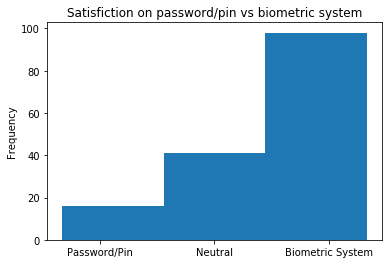

In [5]:
# analysis of Q17
a = dataFile_cleand["Q17"].plot.hist(bins=3)
xticks = [1.5, 3, 4.5]
a.set_xticks(xticks)
a.set_xticklabels(["Password/Pin", "Neutral", "Biometric System"])
a.set_title("Satisfiction on password/pin vs biometric system")

[Text(0, 0.5, 'Preference Score %'), Text(0.5, 0, 'Biometric Systems')]

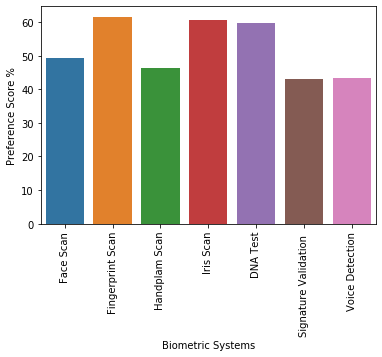

In [100]:
# analysis of Q8
totalScore = len(dataFile_cleand["Q8-FS"]) * 5
totalrespQ8 = []
for j, val in enumerate(qtn_tit):
    totalrespQ8.append((dataFile_cleand[val].sum()*100)/totalScore)

xticks = [0, 1, 2, 3, 4, 5, 6]
graphQ8sc = sns.barplot(x = xticks, y = totalrespQ8)

graphQ8sc.set_xticks(xticks)
graphQ8sc.set_xticklabels(["Face Scan", "Fingerprint Scan", "Handplam Scan", "Iris Scan", "DNA Test", "Signature Validation ", "Voice Detection"], rotation = 90)
graphQ8sc.set(xlabel='Biometric Systems', ylabel='Preference Score %')

[Text(0, 0.5, ''),
 Text(0, 1.5, 'Hardware Failure'),
 Text(0, 2.5, 'Vulnerable Software'),
 Text(0, 3.5, 'Vulnerable Data Storage'),
 Text(0, 4.5, 'Authorization Failure for real person'),
 Text(0, 0, 'Others')]

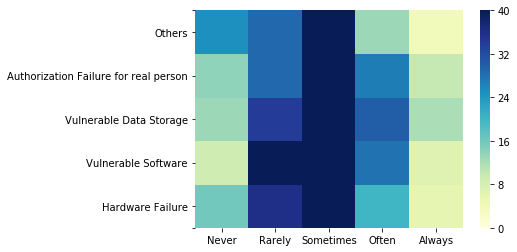

In [94]:
# analysis of Q10
# Q10-HF	Q10-VS	Q10-VDS	Q10-AF	Q10-O
Q10ttl = ["Q10-HF", "Q10-VS", "Q10-VDS", "Q10-AF", "Q10-O"]
issuesCrosscheck = [[]]
for j, val in enumerate(Q10ttl):
    if j:
        issuesCrosscheck.append([])
    for i in range(0,5):
        issuesCrosscheck[j].append(len(dataFile_cleand[dataFile_cleand[val] == i+1]))
    
graphQ10 = sns.heatmap(issuesCrosscheck, vmin=0, vmax=40, cmap="YlGnBu")  
xticks = [0.5, 1.5, 2.5, 3.5, 4.5]
yticks = [0, 0.5, 1.5, 2.5, 3.5, 4.5, 5]
graphQ10.set_xticks(xticks)
graphQ10.set_yticks(yticks)
graphQ10.invert_yaxis()
graphQ10.set_xticklabels(["Never", "Rarely", "Sometimes", "Often", "Always"])
graphQ10.set_yticklabels(["","Hardware Failure", "Vulnerable Software", "Vulnerable Data Storage", "Authorization Failure for real person", "Others"],  rotation = 0)

## This part of analysis will fullfill objective 2
>  To assess user concerns about biometric data privacy.

Some questions:
- Q7. In Sic-fiction movies, we see the thief took the victim’s fingerprints or make the victim unconscious and collect biometric information. Do you think it’s possible in real life?
- Q6. If any reason, you are failed to access the biometric security system what kind of secondary mechanism (recovery option) you prefer to use?
- Q14. Do you ever use any third-party applications that need/store biometric information?
- Q15 and Q16. Do you think all kinds of biometric systems have well-defined Terms and Conditions?